In [1]:
import json
import matplotlib.pyplot as plt
from matplotlib.figure import Figure
from matplotlib.axes import Axes
from matplotlib.container import BarContainer
import numpy as np
from pathlib import Path

def load_data(path, problem):
    data = {}
    
    data_path = Path(path)
    experiment_types = data_path.glob('*/')
    for experiment_type in experiment_types:
        if not experiment_type.is_dir():
            continue
    
        type_data = {}
        
        experiments = experiment_type.glob('*/')
        for experiment in experiments:
            if not experiment.is_dir():
                continue
            
            experiment_data = {}
            
            with open(experiment.joinpath('report.json'), 'r') as f:
                report = json.load(f)
                experiment_data['time'] = report['time']
            
            archive = []
            solutions = experiment.glob('archive/*.json')
            for solution_path in solutions:
                with open(solution_path, 'r') as f:
                    solution = json.load(f)
                archive.append(problem.deap_individual_class().from_dict(solution, problem.deap_individual_class(), problem.member_class()))
            experiment_data['archive'] = archive
            
            type_data[str(experiment.name)] = experiment_data
        
        data[str(experiment_type.name)] = type_data
        print(f'Loaded {experiment_type.name} data')
        
    return data

In [2]:
from deepjanus_mnist.mnist_problem import MNISTProblem
from deepjanus_mnist.mnist_config import MNISTConfig

path = './MNIST'
cfg = MNISTConfig('.')
problem = MNISTProblem(cfg)

# from deepjanus_bng.beamng_problem import BeamNGProblem
# from deepjanus_bng.beamng_config import BeamNGConfig
# 
# path = './BNG'
# cfg = BeamNGConfig('.')
# problem = BeamNGProblem(cfg)

data = load_data(path, problem)

Seed folder "digit5" is empty


Loaded 20_unsafe data
Loaded 50_unsafe data
Loaded 60_unsafe data
Loaded 80_unsafe data


In [3]:
times = []
distances = [[], []]

pairs = [['20_unsafe', '80_unsafe'], ['50_unsafe', '60_unsafe']]
for j in range(2):
    pair = pairs[j]
    for i in range(1,11):
        exp_name = str(i)
        exp1 = data[pair[0]][exp_name]
        exp2 = data[pair[1]][exp_name]
        
        times.append(exp1['time'])
        times.append(exp2['time'])
        
        for ind1 in exp1['archive']:
            for ind2 in exp2['archive']:
                dist = ind1.distance(ind2)
                distances[j].append(dist)

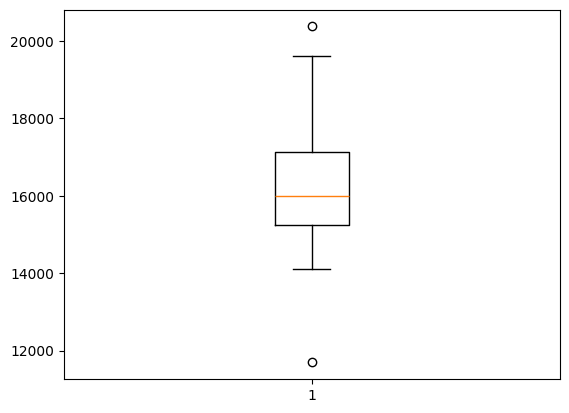

In [8]:
_ = plt.boxplot(times)

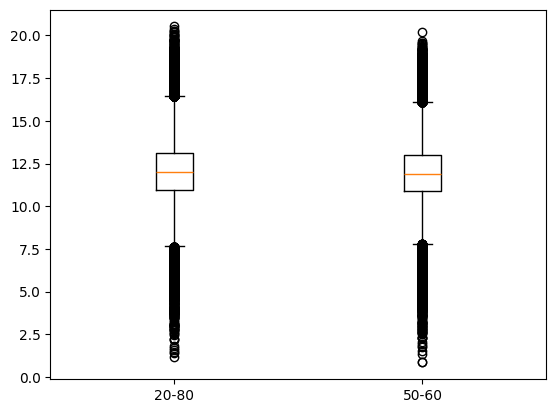

In [10]:
_ = plt.boxplot(distances, labels=['20-80', '50-60'])